# SPRINT 3 - Statistics for Data Science And Machine Learning

## GRUPO DATAWAY - 1TSCPV 

    PROJETO CLUB BUS 

### INTEGRANTES:
- RM561300 - ISABELLA FRANCISCO HEDER
- RM561050 - JOAO VICTOR DALESSIO MIRANDA
- RM561477 - PAULO HENRIQUE LUCHINI
- RM558913 - MILENA BARBOSA DE OLIVEIRA
- RM561926 - ENOS BARROS CRUZ


In [104]:
# IMPORTANDO BIBLIOTECAS
#%pip install pandas
import pandas as pd
#%pip install numpy
import numpy as np
#%pip install matplotlib
import matplotlib.pyplot as plt
#%pip install seaborn
import seaborn as sns
#%pip install prophet
from prophet import Prophet

#%pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# %pip install category_encoders
import category_encoders as ce 

In [105]:
# IMPORTANDO O ARQUIVO CSV FORNECIDO PELA CLICKBUS

dados = pd.read_csv("E:/desafio_clickbus/sprint3_estatistica_dados/dados_est_sprint3.csv", sep = ",")

dados.head()

nk_ota_localizer_id  \
0  bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674ef1fee010c95dcbbab9   
1  5432f12612dd5d749b3be880e779989cf63b5efa4bcc4e76c53e661b07ed7fb8   
2  fb3caed9b2f1b6016d45ccddb19095476e61a2c85faa8ec869b8b02d6c729858   
3  4dc44a6dd592b702feccb493d192210c86965aee68452989fa44926bd8e0a421   
4  aa34ed7fd0a6b405df2df1bf9f8d68e6df9b9a868a6181f2a990463e6eec11d3   

                                                         fk_contact  \
0  a7218ff4ee7d37d48d2b4391b955627cb089870b934912e039288d3a28c3f210   
1  37228485e0dc83d84d1bcd1bef3dc632301bf6cb22c8b52e8fcd8ae7c503544b   
2  3467ec081e2421e72c96e7203b929d21927fd00b6b5f28574f88bbdf2702d02a   
3  ab3251a2be0f69713b8f97b0e9d1579e31551f4fd4facfad94978b417058b424   
4  ceea0de820a6379f2c4215bddaec66c33994b304607e56d801cfcb2d5d57bded   

  date_purchase time_purchase  \
0    2018-12-26      15:33:35   
1    2018-12-05      15:07:57   
2    2018-12-21      18:41:54   
3    2018-12-06      14:01:38   
4    2021-02-23      20:08:25   

                                             place_origin_departure  \
0  6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b   
1  10e4e7caf8b078429bb1c80b1a10118ac6f963eff098fd25a66c78862ae5ebce   
2  7688b6ef52555962d008fff894223582c484517cea7da49ee67800adc7fc8866   
3  4e07408562bedb8b60ce05c1decfe3ad16b72230967de01f640b7e4729b49fce   
4  7688b6ef52555962d008fff894223582c484517cea7da49ee67800adc7fc8866   

                                        place_destination_departure  \
0  50e9a8665b62c8d68bccc77c7c92431a1aa26ccbd38ed4bba8dd7422a3a4ab70   
1  e6d41d208672a4e50b86d959f4a6254975e6fb9b0881166af52c9fe3b5825de2   
2  8c1f1046219ddd216a023f792356ddf127fce372a72ec9b4cdac989ee5b0b455   
3  d6acb3c1a79e57bcc03d976cb4d98f56edccd4cf426392e8cd4b01b965ab808b   
4  23765fc69c4e3c0b10f5d15471dc2245e2a19af16b513f85aa4b83bd033762a4   

  place_origin_return place_destination_return  \
0                   0                        0   
1                   0                        0   
2                   0                        0   
3                   0                        0   
4                   0                        0   

                                       fk_departure_ota_bus_company  \
0  8527a891e224136950ff32ca212b45bc93f69fbb801c3b1ebedac52775f99e61   
1  36ebe205bcdfc499a25e6923f4450fa8d48196ceb4fa0ce077d9d8ec4a36926d   
2  ec2e990b934dde55cb87300629cedfc21b15cd28bbcf77d8bbdc55359d7689da   
3  5f9c4ab08cac7457e9111a30e4664920607ea2c115a1433d7be98e97e64244ca   
4  48449a14a4ff7d79bb7a1b6f3d488eba397c36ef25634c111b49baf362511afc   

  fk_return_ota_bus_company  gmv_success  total_tickets_quantity_success  
0                         1        89.09                               1  
1                         1       155.97                               1  
2                         1       121.99                               1  
3                         1        55.22                               1  
4                         1        45.31                               1

In [106]:
dados.shape

(1741344, 12)

## MUDANDO OS NOMES DAS COLUNAS

In [107]:
# pegando nome das colunas
dados.head(0)

Empty DataFrame
Columns: [nk_ota_localizer_id, fk_contact, date_purchase, time_purchase, place_origin_departure, place_destination_departure, place_origin_return, place_destination_return, fk_departure_ota_bus_company, fk_return_ota_bus_company, gmv_success, total_tickets_quantity_success]
Index: []

In [108]:
dados.columns = ['id_compra', 'id_cliente', 'data_compra', 'hora_compra', 'origem_ida', 'destino_ida', 'origem_volta', 'destino_volta', 'id_companhia_ida', 'id_companhia_volta', 'valor_ticket', 'quantidade_tickets']
dados.head(0)

Empty DataFrame
Columns: [id_compra, id_cliente, data_compra, hora_compra, origem_ida, destino_ida, origem_volta, destino_volta, id_companhia_ida, id_companhia_volta, valor_ticket, quantidade_tickets]
Index: []

# **MUDANDO OS DADOS CRIPTOGRAFADOS:**

#### **MUDANDO IDS DOS CLIENTES**

In [109]:
dados['id_cliente'] = pd.Categorical(dados['id_cliente']).codes

dados.head()

id_compra  \
0  bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674ef1fee010c95dcbbab9   
1  5432f12612dd5d749b3be880e779989cf63b5efa4bcc4e76c53e661b07ed7fb8   
2  fb3caed9b2f1b6016d45ccddb19095476e61a2c85faa8ec869b8b02d6c729858   
3  4dc44a6dd592b702feccb493d192210c86965aee68452989fa44926bd8e0a421   
4  aa34ed7fd0a6b405df2df1bf9f8d68e6df9b9a868a6181f2a990463e6eec11d3   

   id_cliente data_compra hora_compra  \
0      380081  2018-12-26    15:33:35   
1      125030  2018-12-05    15:07:57   
2      118673  2018-12-21    18:41:54   
3      389356  2018-12-06    14:01:38   
4      470537  2021-02-23    20:08:25   

                                                         origem_ida  \
0  6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b   
1  10e4e7caf8b078429bb1c80b1a10118ac6f963eff098fd25a66c78862ae5ebce   
2  7688b6ef52555962d008fff894223582c484517cea7da49ee67800adc7fc8866   
3  4e07408562bedb8b60ce05c1decfe3ad16b72230967de01f640b7e4729b49fce   
4  7688b6ef52555962d008fff894223582c484517cea7da49ee67800adc7fc8866   

                                                        destino_ida  \
0  50e9a8665b62c8d68bccc77c7c92431a1aa26ccbd38ed4bba8dd7422a3a4ab70   
1  e6d41d208672a4e50b86d959f4a6254975e6fb9b0881166af52c9fe3b5825de2   
2  8c1f1046219ddd216a023f792356ddf127fce372a72ec9b4cdac989ee5b0b455   
3  d6acb3c1a79e57bcc03d976cb4d98f56edccd4cf426392e8cd4b01b965ab808b   
4  23765fc69c4e3c0b10f5d15471dc2245e2a19af16b513f85aa4b83bd033762a4   

  origem_volta destino_volta  \
0            0             0   
1            0             0   
2            0             0   
3            0             0   
4            0             0   

                                                   id_companhia_ida  \
0  8527a891e224136950ff32ca212b45bc93f69fbb801c3b1ebedac52775f99e61   
1  36ebe205bcdfc499a25e6923f4450fa8d48196ceb4fa0ce077d9d8ec4a36926d   
2  ec2e990b934dde55cb87300629cedfc21b15cd28bbcf77d8bbdc55359d7689da   
3  5f9c4ab08cac7457e9111a30e4664920607ea2c115a1433d7be98e97e64244ca   
4  48449a14a4ff7d79bb7a1b6f3d488eba397c36ef25634c111b49baf362511afc   

  id_companhia_volta  valor_ticket  quantidade_tickets  
0                  1         89.09                   1  
1                  1        155.97                   1  
2                  1        121.99                   1  
3                  1         55.22                   1  
4                  1         45.31                   1

In [110]:
# filtrando só pra o cliente 20 - pra ver se funcionou e não agrupou
dados_cliente_20 = dados[dados['id_cliente'] == 20]
dados_cliente_20.head()

id_compra  \
818868   a08aa40f5fd40c62c72ffcfcd4e4866afe6d1fec924a8d1b380604fa09e38047   
1101665  aa2ea7c4eb6513c1983aac400b84d37fcdcd44c4f2ddfd076aaa92c57d00bff7   
1121992  5b3740994573c4a91d569fba52428166a3721efb0116cf96c3832ae441427ca6   

         id_cliente data_compra hora_compra  \
818868           20  2017-06-21    15:22:07   
1101665          20  2019-07-29    15:27:25   
1121992          20  2017-07-27    13:57:16   

                                                               origem_ida  \
818868   f369cb89fc627e668987007d121ed1eacdc01db9e28f8bb26f358b7d8c4f08ac   
1101665  f369cb89fc627e668987007d121ed1eacdc01db9e28f8bb26f358b7d8c4f08ac   
1121992  f369cb89fc627e668987007d121ed1eacdc01db9e28f8bb26f358b7d8c4f08ac   

                                                              destino_ida  \
818868   75f7313c20144e39edcf57a14733d074aee0c482320d5178ee0ef2f2608c2996   
1101665  be6b5b7140b02bff9ad8fa5aaaeca5973791521c5029c9f6b42390f8b87ce2bd   
1121992  be6b5b7140b02bff9ad8fa5aaaeca5973791521c5029c9f6b42390f8b87ce2bd   

                                                             origem_volta  \
818868   75f7313c20144e39edcf57a14733d074aee0c482320d5178ee0ef2f2608c2996   
1101665                                                                 0   
1121992                                                                 0   

                                                            destino_volta  \
818868   f369cb89fc627e668987007d121ed1eacdc01db9e28f8bb26f358b7d8c4f08ac   
1101665                                                                 0   
1121992                                                                 0   

                                                         id_companhia_ida  \
818868   2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e   
1101665  2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e   
1121992  2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e   

                                                       id_companhia_volta  \
818868   2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e   
1101665                                                                 1   
1121992                                                                 1   

         valor_ticket  quantidade_tickets  
818868         225.55                   2  
1101665        167.54                   2  
1121992        159.21                   2

#### **MUDANDO NOME DAS VIAÇÕES**

    Verificando quantas viações existem

In [111]:
ids_ida = dados.loc[dados['id_companhia_ida'] != 1, 'id_companhia_ida']
ids_volta = dados.loc[dados['id_companhia_volta'] != 1, 'id_companhia_volta']
print(ids_ida.nunique())
print(ids_volta.nunique())

ids_unicos = pd.Series(pd.concat([ids_ida, ids_volta]).unique())
print(ids_unicos.nunique())


299
275
300


In [112]:
# nomeando as companhias com companhia (1, 2, 3, ...) - na coluna concatenada
mapa_ids = {id_: f'companhia{i+1}' for i, id_ in enumerate(ids_unicos)}

# colocando os nomes nas colunas separadas
dados['id_companhia_ida'] = dados['id_companhia_ida'].apply(lambda x: mapa_ids.get(x, x))
dados['id_companhia_volta'] = dados['id_companhia_volta'].apply(lambda x: mapa_ids.get(x, x))

dados.head()

id_compra  \
0  bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674ef1fee010c95dcbbab9   
1  5432f12612dd5d749b3be880e779989cf63b5efa4bcc4e76c53e661b07ed7fb8   
2  fb3caed9b2f1b6016d45ccddb19095476e61a2c85faa8ec869b8b02d6c729858   
3  4dc44a6dd592b702feccb493d192210c86965aee68452989fa44926bd8e0a421   
4  aa34ed7fd0a6b405df2df1bf9f8d68e6df9b9a868a6181f2a990463e6eec11d3   

   id_cliente data_compra hora_compra  \
0      380081  2018-12-26    15:33:35   
1      125030  2018-12-05    15:07:57   
2      118673  2018-12-21    18:41:54   
3      389356  2018-12-06    14:01:38   
4      470537  2021-02-23    20:08:25   

                                                         origem_ida  \
0  6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b   
1  10e4e7caf8b078429bb1c80b1a10118ac6f963eff098fd25a66c78862ae5ebce   
2  7688b6ef52555962d008fff894223582c484517cea7da49ee67800adc7fc8866   
3  4e07408562bedb8b60ce05c1decfe3ad16b72230967de01f640b7e4729b49fce   
4  7688b6ef52555962d008fff894223582c484517cea7da49ee67800adc7fc8866   

                                                        destino_ida  \
0  50e9a8665b62c8d68bccc77c7c92431a1aa26ccbd38ed4bba8dd7422a3a4ab70   
1  e6d41d208672a4e50b86d959f4a6254975e6fb9b0881166af52c9fe3b5825de2   
2  8c1f1046219ddd216a023f792356ddf127fce372a72ec9b4cdac989ee5b0b455   
3  d6acb3c1a79e57bcc03d976cb4d98f56edccd4cf426392e8cd4b01b965ab808b   
4  23765fc69c4e3c0b10f5d15471dc2245e2a19af16b513f85aa4b83bd033762a4   

  origem_volta destino_volta id_companhia_ida id_companhia_volta  \
0            0             0       companhia1       companhia300   
1            0             0       companhia2       companhia300   
2            0             0       companhia3       companhia300   
3            0             0       companhia4       companhia300   
4            0             0       companhia5       companhia300   

   valor_ticket  quantidade_tickets  
0         89.09                   1  
1        155.97                   1  
2        121.99                   1  
3         55.22                   1  
4         45.31                   1

    Verificando se funcionou

In [113]:
ids_ida = dados.loc[dados['id_companhia_ida'] != 1, 'id_companhia_ida']
ids_volta = dados.loc[dados['id_companhia_volta'] != 1, 'id_companhia_volta']
print(ids_ida.nunique())
print(ids_volta.nunique())

ids_unicos = pd.Series(pd.concat([ids_ida, ids_volta]).unique())
print(ids_unicos.nunique())

299
275
300


In [114]:
# transformando data e hora em datetime
dados['data_compra'] = pd.to_datetime(dados['data_compra'], format='%Y-%m-%d')
dados['hora_compra'] = pd.to_datetime(dados['hora_compra'], format='%H:%M:%S').dt.time

# criando colunas novas com informações que facilitam a análise
dados["dia_da_semana"] = dados['data_compra'].dt.day_name()  # nome do dia da semana
dados["mes_ano"] = dados['data_compra'].dt.to_period('M')
dados["hora"] = pd.to_datetime(dados["hora_compra"].astype(str), format='%H:%M:%S').dt.hour  # seleciona só a hora 
dados["ano"] = dados['data_compra'].dt.year

# criando variáveis para vendas x
vendas_diarias = dados.groupby("data_compra").size().rename('compras')
vendas_semanais = dados.set_index("data_compra").resample("W-MON").size().rename('compras')
vendas_mensais = dados.groupby("mes_ano").size().rename('compras')
vendas_anuais = dados.groupby("ano").size().rename('compras')

#### **MUDANDO ID DE COMPRA**
    Ordenando o id por data e hora da compra
    Ou seja: o id 1 será da primeira data do dataset, no primeiro horário
    E assim em diante

In [115]:
# ordena por data e hora da compra
dados = dados.sort_values(by=['data_compra', 'hora_compra']).reset_index(drop=True)

# muda os ids a partir da ordem nova
dados['id_compra'] = range(1, len(dados) + 1)



dados.head(10)

id_compra  id_cliente data_compra hora_compra  \
0          1      578847  2013-09-12    16:04:22   
1          2       57527  2013-09-13    14:37:45   
2          3      513653  2013-09-17    16:28:09   
3          4      307300  2013-09-18    12:41:05   
4          5      251592  2013-09-19    20:10:37   
5          6      251592  2013-09-19    20:24:01   
6          7      449138  2013-09-19    22:24:55   
7          8      235720  2013-09-24    09:34:21   
8          9      235720  2013-09-24    09:43:33   
9         10      414688  2013-09-25    10:41:31   

                                                         origem_ida  \
0  81b8a03f97e8787c53fe1a86bda042b6f0de9b0ec9c09357e107c99ba4d6948a   
1  7688b6ef52555962d008fff894223582c484517cea7da49ee67800adc7fc8866   
2  81b8a03f97e8787c53fe1a86bda042b6f0de9b0ec9c09357e107c99ba4d6948a   
3  6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b   
4  7688b6ef52555962d008fff894223582c484517cea7da49ee67800adc7fc8866   
5  d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35   
6  6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b   
7  7688b6ef52555962d008fff894223582c484517cea7da49ee67800adc7fc8866   
8  7688b6ef52555962d008fff894223582c484517cea7da49ee67800adc7fc8866   
9  37834f2f25762f23e1f74a531cbe445db73d6765ebe60878a7dfbecd7d4af6e1   

                                                        destino_ida  \
0  7b0838c2af7e6b1f3fe5a49c32dd459d997a931cee349ca6869f3c17cc838394   
1  81b8a03f97e8787c53fe1a86bda042b6f0de9b0ec9c09357e107c99ba4d6948a   
2  7688b6ef52555962d008fff894223582c484517cea7da49ee67800adc7fc8866   
3  23765fc69c4e3c0b10f5d15471dc2245e2a19af16b513f85aa4b83bd033762a4   
4  d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35   
5  7688b6ef52555962d008fff894223582c484517cea7da49ee67800adc7fc8866   
6  23765fc69c4e3c0b10f5d15471dc2245e2a19af16b513f85aa4b83bd033762a4   
7  eb624dbe56eb6620ae62080c10a273cab73ae8eca98ab17b731446a31c79393a   
8  eb624dbe56eb6620ae62080c10a273cab73ae8eca98ab17b731446a31c79393a   
9  f0bc318fb8965cad8d73d578cd03c63b7987dc6a79b906aada091e1b6a13443f   

  origem_volta destino_volta id_companhia_ida id_companhia_volta  \
0            0             0      companhia36       companhia300   
1            0             0       companhia9         companhia9   
2            0             0       companhia3       companhia300   
3            0             0      companhia14       companhia300   
4            0             0       companhia3       companhia300   
5            0             0       companhia3       companhia300   
6            0             0      companhia14       companhia300   
7            0             0       companhia3       companhia300   
8            0             0       companhia3       companhia300   
9            0             0       companhia3       companhia300   

   valor_ticket  quantidade_tickets dia_da_semana  mes_ano  hora   ano  
0         65.63                   1      Thursday  2013-09    16  2013  
1        164.78                   2        Friday  2013-09    14  2013  
2         81.62                   1       Tuesday  2013-09    16  2013  
3         46.42                   1     Wednesday  2013-09    12  2013  
4         87.70                   1      Thursday  2013-09    20  2013  
5         79.30                   1      Thursday  2013-09    20  2013  
6         45.84                   2      Thursday  2013-09    22  2013  
7        126.50                   1       Tuesday  2013-09     9  2013  
8        126.50                   1       Tuesday  2013-09     9  2013  
9         28.50                   1     Wednesday  2013-09    10  2013

In [116]:
# conferindo se tem um id diferente por linha
print(dados['id_compra'].nunique())
print(dados.shape)

1741344
(1741344, 16)


### **MUDANDO O NOME DAS LOCALIZAÇÕES**

In [117]:
moda_destino = dados['destino_ida'].mode()

print("São Paulo: ", moda_destino)


São Paulo:  0    6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b
Name: destino_ida, dtype: object


In [ ]:
# juntando os ids, pra facilitar e mudar os ids juntos
todos_valores = pd.concat([
    dados['origem_ida'],
    dados['destino_ida'],
    dados['origem_volta'],
    dados['destino_volta']])

todos_valores = todos_valores[todos_valores != '0'] # 0 representa que não houve volta portanto não tem porque contar como terminal
quantas = todos_valores.nunique() # quero ver quantos locais diferentes eles trabalham
print("quantidade de destinos: ", quantas, '\n')

frequencia = todos_valores.value_counts()
top_50 = frequencia.head(50)
print("top 50 destinos: \n", top_50)


quantidade de destinos:  2992 

top 50 destinos: 
 6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b    508318
7688b6ef52555962d008fff894223582c484517cea7da49ee67800adc7fc8866    334324
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e    154450
4e07408562bedb8b60ce05c1decfe3ad16b72230967de01f640b7e4729b49fce    125287
81b8a03f97e8787c53fe1a86bda042b6f0de9b0ec9c09357e107c99ba4d6948a    120171
fbb2a73b0bacf3953186a92029e3e9b130373a9ff1449407e6125b3481f4f0ca    104910
4652614c4d8778e57a970722f142d832798c133a14b1232a92ffe26a0e98919e     70751
48449a14a4ff7d79bb7a1b6f3d488eba397c36ef25634c111b49baf362511afc     66881
3ada92f28b4ceda38562ebf047c6ff05400d4c572352a1142eedfef67d21e662     56603
eb624dbe56eb6620ae62080c10a273cab73ae8eca98ab17b731446a31c79393a     54787
f369cb89fc627e668987007d121ed1eacdc01db9e28f8bb26f358b7d8c4f08ac     51712
62f77e7d6197863ac98d9e0cfa76bea0c8e05379ed5281afbe72f7fc206fe37b     51162
ef2d127de37b942baad06145e54b0c619a1f22327b2ebbcfb

### **A PARTIR DE DADOS DA CLICKBUS E DO BRASIL, SELECIONEI AS 8 MAIORES RODOVIÁRIAS DO PAÍS**
    e o resto eu preenchi conforme dados das rodoviárias mais visitadas, pesquisando no site da clickbus se eram destinos deles

In [119]:
nomes_terminais = [
    'Terminal Rodoviario do Tiete - Sao Paulo, SP',
    'Rodoviaria Novo Rio - Rio de Janeiro, RJ',
    'Terminal Rodoviario Governador Israel Pinheiro - Belo Horizonte, MG',
    'Terminal Rodoviario Curitiba - Curitiba, PR',
    'Terminal Rodoviario Rita Maria - Florianopolis, SC',
    'Rodoviaria de Porto Alegre - Porto Alegre, RS',
    'Terminal Rodoviario Armando Viana de Castro - Salvador, BA',
    'Rodoviaria Interestadual de Brasilia - Brasilia, DF',
    'Terminal Rodoviario Barra Funda - Sao Paulo, SP',
    'Terminal Rodoviario Jabaquara - Sao Paulo, SP',
    'Terminal Rodoviario de Campinas - Campinas, SP',
    'Terminal Rodoviario Engenheiro Joao Thome - Fortaleza, CE',
    'Terminal Rodoviario de Recife (TIP) - Recife, PE',
    'Terminal Rodoviario de Goiania - Goiania, GO',
    'Rodoviaria de Manaus - Manaus, AM',
    'Terminal Rodoviario de Belem (Sao Bras) - Belem, PA',
    'Terminal Rodoviario de Campo Grande - Campo Grande, MS',
    'Terminal Rodoviario de Cuiaba - Cuiaba, MT',
    'Terminal Rodoviario de Natal - Natal, RN',
    'Terminal Rodoviario de Maceio - Maceio, AL',
    'Terminal Rodoviario de Joao Pessoa - Joao Pessoa, PB',
    'Terminal Rodoviario de Sao Luis - Sao Luis, MA',
    'Terminal Rodoviario de Teresina - Teresina, PI',
    'Terminal Rodoviario de Aracaju - Aracaju, SE',
    'Terminal Rodoviario de Palmas - Palmas, TO',
    'Terminal Rodoviario de Rio Branco - Rio Branco, AC',
    'Terminal Rodoviario de Porto Velho - Porto Velho, RO',
    'Terminal Rodoviario de Boa Vista - Boa Vista, RR',
    'Terminal Rodoviario de Londrina - Londrina, PR',
    'Terminal Rodoviario de Maringa - Maringa, PR',
    'Terminal Rodoviario de Joinville - Joinville, SC',
    'Terminal Rodoviario de Blumenau - Blumenau, SC',
    'Terminal Rodoviario de Caxias do Sul - Caxias do Sul, RS',
    'Terminal Rodoviario de Pelotas - Pelotas, RS',
    'Terminal Rodoviario de Santos - Santos, SP',
    'Terminal Rodoviario de Ribeirao Preto - Ribeirao Preto, SP',
    'Terminal Rodoviario de Sorocaba - Sorocaba, SP',
    'Terminal Rodoviario de Sao Jose dos Campos - Sao Jose dos Campos, SP',
    'Terminal Rodoviario de Uberlandia - Uberlandia, MG',
    'Terminal Rodoviario de Montes Claros - Montes Claros, MG',
    'Terminal Rodoviario de Vitoria - Vitoria, ES',
    'Terminal Rodoviario de Feira de Santana - Feira de Santana, BA',
    'Terminal Rodoviario de Caruaru - Caruaru, PE',
    'Terminal Rodoviario de Petrolina - Petrolina, PE',
    'Terminal Rodoviario de Bauru - Bauru, SP',
    'Terminal Rodoviario de Franca - Franca, SP'
]

mapa_terminais = dict(zip(top_50.index, nomes_terminais))

for coluna in ['origem_ida', 'destino_ida', 'origem_volta', 'destino_volta']:
    dados[coluna] = dados[coluna].replace(mapa_terminais)


# refazendo o que foi feito na cell anterior pra verificar
todos_valores = pd.concat([
    dados['origem_ida'],
    dados['destino_ida'],
    dados['origem_volta'],
    dados['destino_volta']])
todos_valores = todos_valores[todos_valores != '0'] 
quantas = todos_valores.nunique()
print(quantas, '\n')
frequencia = todos_valores.value_counts()
top_50 = frequencia.head(47)
print(top_50)

dados.head(10)

2992 

Terminal Rodoviario do Tiete - Sao Paulo, SP                            508318
Rodoviaria Novo Rio - Rio de Janeiro, RJ                                334324
Terminal Rodoviario Governador Israel Pinheiro - Belo Horizonte, MG     154450
Terminal Rodoviario Curitiba - Curitiba, PR                             125287
Terminal Rodoviario Rita Maria - Florianopolis, SC                      120171
Rodoviaria de Porto Alegre - Porto Alegre, RS                           104910
Terminal Rodoviario Armando Viana de Castro - Salvador, BA               70751
Rodoviaria Interestadual de Brasilia - Brasilia, DF                      66881
Terminal Rodoviario Barra Funda - Sao Paulo, SP                          56603
Terminal Rodoviario Jabaquara - Sao Paulo, SP                            54787
Terminal Rodoviario de Campinas - Campinas, SP                           51712
Terminal Rodoviario Engenheiro Joao Thome - Fortaleza, CE                51162
Terminal Rodoviario de Recife (TIP) - Recife,

id_compra  id_cliente data_compra hora_compra  \
0          1      578847  2013-09-12    16:04:22   
1          2       57527  2013-09-13    14:37:45   
2          3      513653  2013-09-17    16:28:09   
3          4      307300  2013-09-18    12:41:05   
4          5      251592  2013-09-19    20:10:37   
5          6      251592  2013-09-19    20:24:01   
6          7      449138  2013-09-19    22:24:55   
7          8      235720  2013-09-24    09:34:21   
8          9      235720  2013-09-24    09:43:33   
9         10      414688  2013-09-25    10:41:31   

                                                         origem_ida  \
0                Terminal Rodoviario Rita Maria - Florianopolis, SC   
1                          Rodoviaria Novo Rio - Rio de Janeiro, RJ   
2                Terminal Rodoviario Rita Maria - Florianopolis, SC   
3                      Terminal Rodoviario do Tiete - Sao Paulo, SP   
4                          Rodoviaria Novo Rio - Rio de Janeiro, RJ   
5                      Terminal Rodoviario de Goiania - Goiania, GO   
6                      Terminal Rodoviario do Tiete - Sao Paulo, SP   
7                          Rodoviaria Novo Rio - Rio de Janeiro, RJ   
8                          Rodoviaria Novo Rio - Rio de Janeiro, RJ   
9  37834f2f25762f23e1f74a531cbe445db73d6765ebe60878a7dfbecd7d4af6e1   

                                                        destino_ida  \
0  7b0838c2af7e6b1f3fe5a49c32dd459d997a931cee349ca6869f3c17cc838394   
1                Terminal Rodoviario Rita Maria - Florianopolis, SC   
2                          Rodoviaria Novo Rio - Rio de Janeiro, RJ   
3                        Terminal Rodoviario de Maceio - Maceio, AL   
4                      Terminal Rodoviario de Goiania - Goiania, GO   
5                          Rodoviaria Novo Rio - Rio de Janeiro, RJ   
6                        Terminal Rodoviario de Maceio - Maceio, AL   
7                     Terminal Rodoviario Jabaquara - Sao Paulo, SP   
8                     Terminal Rodoviario Jabaquara - Sao Paulo, SP   
9                    Terminal Rodoviario de Blumenau - Blumenau, SC   

  origem_volta destino_volta id_companhia_ida id_companhia_volta  \
0            0             0      companhia36       companhia300   
1            0             0       companhia9         companhia9   
2            0             0       companhia3       companhia300   
3            0             0      companhia14       companhia300   
4            0             0       companhia3       companhia300   
5            0             0       companhia3       companhia300   
6            0             0      companhia14       companhia300   
7            0             0       companhia3       companhia300   
8            0             0       companhia3       companhia300   
9            0             0       companhia3       companhia300   

   valor_ticket  quantidade_tickets dia_da_semana  mes_ano  hora   ano  
0         65.63                   1      Thursday  2013-09    16  2013  
1        164.78                   2        Friday  2013-09    14  2013  
2         81.62                   1       Tuesday  2013-09    16  2013  
3         46.42                   1     Wednesday  2013-09    12  2013  
4         87.70                   1      Thursday  2013-09    20  2013  
5         79.30                   1      Thursday  2013-09    20  2013  
6         45.84                   2      Thursday  2013-09    22  2013  
7        126.50                   1       Tuesday  2013-09     9  2013  
8        126.50                   1       Tuesday  2013-09     9  2013  
9         28.50                   1     Wednesday  2013-09    10  2013

# **ANÁLISES**

In [120]:
dados.head()

id_compra  id_cliente data_compra hora_compra  \
0          1      578847  2013-09-12    16:04:22   
1          2       57527  2013-09-13    14:37:45   
2          3      513653  2013-09-17    16:28:09   
3          4      307300  2013-09-18    12:41:05   
4          5      251592  2013-09-19    20:10:37   

                                           origem_ida  \
0  Terminal Rodoviario Rita Maria - Florianopolis, SC   
1            Rodoviaria Novo Rio - Rio de Janeiro, RJ   
2  Terminal Rodoviario Rita Maria - Florianopolis, SC   
3        Terminal Rodoviario do Tiete - Sao Paulo, SP   
4            Rodoviaria Novo Rio - Rio de Janeiro, RJ   

                                                        destino_ida  \
0  7b0838c2af7e6b1f3fe5a49c32dd459d997a931cee349ca6869f3c17cc838394   
1                Terminal Rodoviario Rita Maria - Florianopolis, SC   
2                          Rodoviaria Novo Rio - Rio de Janeiro, RJ   
3                        Terminal Rodoviario de Maceio - Maceio, AL   
4                      Terminal Rodoviario de Goiania - Goiania, GO   

  origem_volta destino_volta id_companhia_ida id_companhia_volta  \
0            0             0      companhia36       companhia300   
1            0             0       companhia9         companhia9   
2            0             0       companhia3       companhia300   
3            0             0      companhia14       companhia300   
4            0             0       companhia3       companhia300   

   valor_ticket  quantidade_tickets dia_da_semana  mes_ano  hora   ano  
0         65.63                   1      Thursday  2013-09    16  2013  
1        164.78                   2        Friday  2013-09    14  2013  
2         81.62                   1       Tuesday  2013-09    16  2013  
3         46.42                   1     Wednesday  2013-09    12  2013  
4         87.70                   1      Thursday  2013-09    20  2013

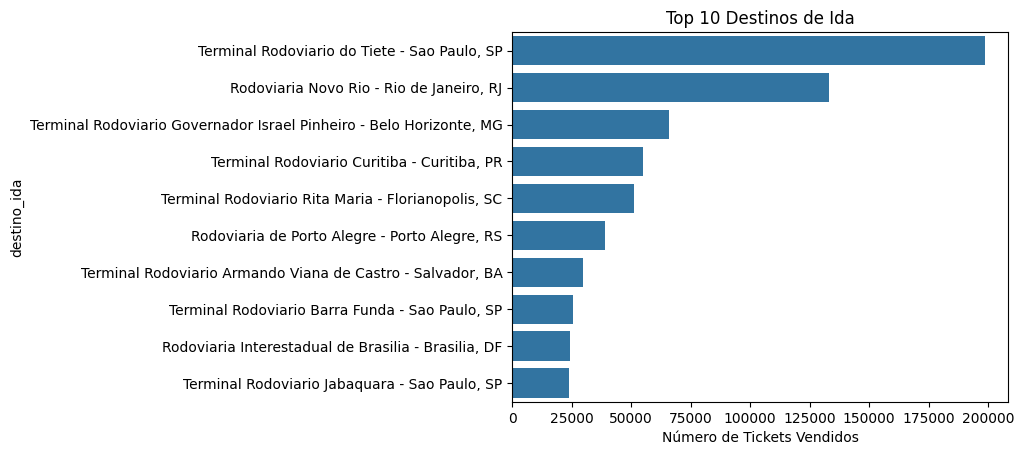

In [121]:
# pega os top 10 destinos de ida
top_destinos = dados['destino_ida'].value_counts().head(10)
sns.barplot(x=top_destinos.values, y=top_destinos.index)
plt.title('Top 10 Destinos de Ida')
plt.xlabel('Número de Tickets Vendidos')
plt.show()

### **ROTAS MAIS POPULARES E TICKET MÉDIO**

Quero saber as top rotas;

Uso o count da quantidade de tickets pra saber quantos clientes já fizeram essa rota (numero de tickets vendidos)

Uso o mean pra fazer a média aritmética de quanto custam os tickets pra essa rota

Ordeno em decrescente para que as primeiras linhas sejam as maiores

In [122]:
nova_tabela = dados.copy()

nova_tabela['rota_ida'] = nova_tabela['origem_ida'] + ' ---> ' + nova_tabela['destino_ida']

top_rotas = nova_tabela.groupby('rota_ida').agg(vendas = ('quantidade_tickets', 'count'), ticket_medio = ('valor_ticket', 'mean')).sort_values('vendas', ascending=False).head(10)

# só dois decimais no valor do ticket medio
top_rotas['ticket_medio'] = top_rotas['ticket_medio'].map('{:.2f}'.format)

top_rotas.head(10)


vendas  \
rota_ida                                                                                                                        
Terminal Rodoviario do Tiete - Sao Paulo, SP ---> Rodoviaria Novo Rio - Rio de Janeiro, RJ                              37879   
Rodoviaria Novo Rio - Rio de Janeiro, RJ ---> Terminal Rodoviario do Tiete - Sao Paulo, SP                              35965   
Terminal Rodoviario do Tiete - Sao Paulo, SP ---> Terminal Rodoviario Governador Israel Pinheiro - Belo Horizonte, MG   20075   
Terminal Rodoviario Governador Israel Pinheiro - Belo Horizonte, MG ---> Terminal Rodoviario do Tiete - Sao Paulo, SP   18581   
Terminal Rodoviario do Tiete - Sao Paulo, SP ---> Terminal Rodoviario de Maceio - Maceio, AL                            15391   
Terminal Rodoviario de Joao Pessoa - Joao Pessoa, PB ---> Terminal Rodoviario de Joao Pessoa - Joao Pessoa, PB          14750   
Terminal Rodoviario do Tiete - Sao Paulo, SP ---> Terminal Rodoviario Curitiba - Curitiba, PR                           11329   
Rodoviaria Novo Rio - Rio de Janeiro, RJ ---> Terminal Rodoviario Rita Maria - Florianopolis, SC                        10938   
Terminal Rodoviario Curitiba - Curitiba, PR ---> Terminal Rodoviario do Tiete - Sao Paulo, SP                           10466   
Terminal Rodoviario Rita Maria - Florianopolis, SC ---> Rodoviaria Novo Rio - Rio de Janeiro, RJ                         9804   

                                                                                                                      ticket_medio  
rota_ida                                                                                                                            
Terminal Rodoviario do Tiete - Sao Paulo, SP ---> Rodoviaria Novo Rio - Rio de Janeiro, RJ                                  231.46  
Rodoviaria Novo Rio - Rio de Janeiro, RJ ---> Terminal Rodoviario do Tiete - Sao Paulo, SP                                  210.98  
Terminal Rodoviario do Tiete - Sao Paulo, SP ---> Terminal Rodoviario Governador Israel Pinheiro - Belo Horizonte, MG       170.29  
Terminal Rodoviario Governador Israel Pinheiro - Belo Horizonte, MG ---> Terminal Rodoviario do Tiete - Sao Paulo, SP       167.38  
Terminal Rodoviario do Tiete - Sao Paulo, SP ---> Terminal Rodoviario de Maceio - Maceio, AL                                173.44  
Terminal Rodoviario de Joao Pessoa - Joao Pessoa, PB ---> Terminal Rodoviario de Joao Pessoa - Joao Pessoa, PB              240.15  
Terminal Rodoviario do Tiete - Sao Paulo, SP ---> Terminal Rodoviario Curitiba - Curitiba, PR                                58.81  
Rodoviaria Novo Rio - Rio de Janeiro, RJ ---> Terminal Rodoviario Rita Maria - Florianopolis, SC                            212.32  
Terminal Rodoviario Curitiba - Curitiba, PR ---> Terminal Rodoviario do Tiete - Sao Paulo, SP                                56.01  
Terminal Rodoviario Rita Maria - Florianopolis, SC ---> Rodoviaria Novo Rio - Rio de Janeiro, RJ                            214.75

    VERIFICANDO AS VARIÁVEIS CRIADAS ANTERIORMENTE

In [123]:
vendas_diarias.head(5), vendas_mensais.head(5), vendas_semanais.head(5)

(data_compra
 2013-09-12    1
 2013-09-13    1
 2013-09-17    1
 2013-09-18    1
 2013-09-19    3
 Name: compras, dtype: int64,
 mes_ano
 2013-09     17
 2013-10     47
 2013-11     83
 2013-12    194
 2014-01    182
 Freq: M, Name: compras, dtype: int64,
 data_compra
 2013-09-16     2
 2013-09-23     5
 2013-09-30    10
 2013-10-07     3
 2013-10-14    13
 Freq: W-MON, Name: compras, dtype: int64)

    GRÁFICO DE VARIAÇÃO DE VENDAS POR ANO

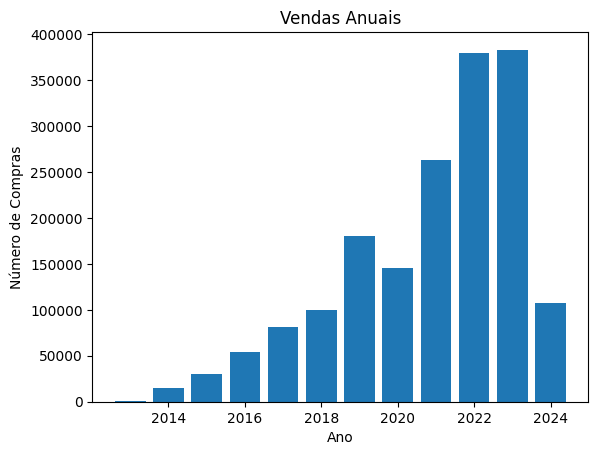

In [124]:
vendas_anuais.head(12)

# variação de vendas por ano
plt.bar(vendas_anuais.index, vendas_anuais.values)
plt.xlabel('Ano')
plt.ylabel('Número de Compras')
plt.title('Vendas Anuais')
plt.show()

### **PROPORÇÃO: COMPRAM SÓ IDA vs IDA E VOLTA**

No dataset dado para nós, foi informado que algumas pessoas não compravam passagem de retorno, e nestes casos, a coluna de retorno recebia o valor 0 ;

Por isso, nesse insight vemos a proporção em porcentagem entre as compras que houveram volta e as que não houveram

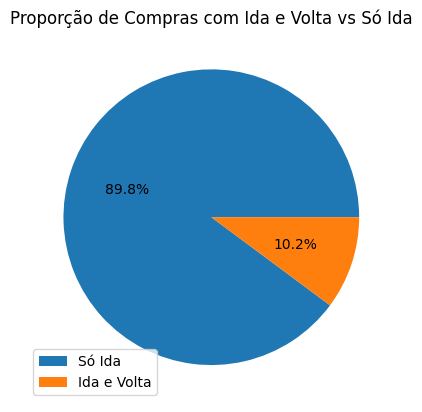

In [125]:
proporcao = (dados['origem_volta'].astype(str) != '0').value_counts(normalize=True) * 100
proporcao.index = ['Só Ida', 'Ida e Volta'] 

plt.pie(proporcao, autopct='%1.1f%%')
plt.title('Proporção de Compras com Ida e Volta vs Só Ida')
plt.legend(proporcao.index)
plt.show()


### **FATURAMENTO ENTRE COMPANHIAS DE ONIBUS**

In [126]:
faturamento_ida = (dados.groupby('id_companhia_ida').agg(tickets = ('quantidade_tickets', 'sum'), receita = ('valor_ticket', lambda x: (x * dados.loc[x.index, 'quantidade_tickets']).sum())))

faturamento_ida.sort_values('receita', ascending=False).head(10)

tickets       receita
id_companhia_ida                       
companhia9         266048  4.603699e+07
companhia25        146057  3.183978e+07
companhia7         113366  2.627698e+07
companhia3         101785  2.612027e+07
companhia6          57886  2.031143e+07
companhia14        102964  1.934344e+07
companhia18         56584  1.642322e+07
companhia12         55756  1.590259e+07
companhia24         52083  1.522124e+07
companhia11         37546  1.361010e+07

## **HEATMAP DE DIA DA SEMANA vs HORA DO DIA**

Um gráfico que mostra os horários onde mais compras são efetuadas.


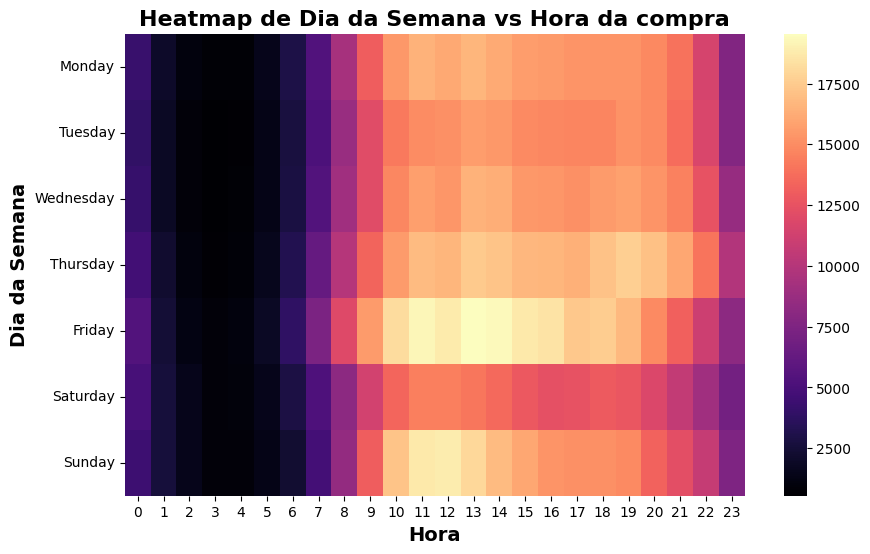

In [127]:
heat = dados.groupby(['dia_da_semana', 'hora']).size().unstack().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
sns.heatmap(heat, cmap='magma')
plt.title('Heatmap de Dia da Semana vs Hora da compra', fontsize=16, fontweight='bold')
plt.xlabel('Hora', fontsize=14, fontweight='bold')
plt.ylabel('Dia da Semana', fontsize=14, fontweight='bold')
plt.show()

### **PROBABILIDADE DE COMPRA DE VOLTA + EXPLICAÇÃO**
    treinando modelo de CLASSIFICAÇÃO - Random Forest

É usado **sample** para pegar apenas uma parte dos dados (20% neste caso), porque se pegar tudo, vai ficar muito tempo rodando (aprendi isso da pior maneira)
 
    TARGET: prever se a pessoa vai comprar passagem de volta ou não (tem_volta / y)
- True se tem volta
- False se não teve volta
#
    VARIÁVEL CATEGÓRICA:
- junta origem e destino numa string só ---> rota
#
    TARGET ENCODING:
- ENCODING é o processo de transformar variáveis como nome, local, rota (categóricas) em números pra que o ML possa trabalhar
- **TARGET ENCODING**: calcula pra cada rota a média de 'tem_volta' (target)
- ex: 40% dos clientes que fizeram uma rota X --> Y voltaram; então a rota X --> Y vira 0.4;
#
    HISTÓRICO CLIENTE:
- pega o total de viagens feitas por cliente e a soma das vezes que o cliente voltou ---> divide um pelo outro pra achar a %
- faz um merge ppra colocar a porcentagem_volta na parte dos dados;

#
    FEATURES:
- cria um dataframe (X) que tem todas as variáveis (features) que o modelo vai usar pra prever o target

**PT 1 - ONE-HOT ENCODING (0 - 1):**
- get dummies: pega os dados de hora e dia da semana e transforma em colunas binárias (1 ou 0) - então cada dia teria uma sequência diferente - meio que cria uma coluna pra cada dia (ex: segunda = 1 0 0 0 0 0 0, terça = 0 1 0 0 0 0 0)
- drop first pra evitar redundância

**PT 2:**
- cria variáveis pro modelo entender melhor

**PT 3:**
- adiciona a rota codificada (target encoder) - representando o impacto da rota na chance de retorno a partir do seu histórico
- adiciona a porcentagem de volta do cliente (histórico) que indica o comportamento deles
#
    DIVISÃO DOS DADOS:
- 80% treino e 20% teste com a proporção dos que voltam e não voltam mantida entre as divisões (stratify)
#
    TREINO (RamdomForest == supervisionado):
- cria 100 árvores de decisão, cada uma treinada com uma parta aleatória dos dados - a previsão final é decidida por uma """"votação"""" dessas árvores
- evita overfitting porque sempre varia e todos tem dados diferentes
- até um ponto, quantas mais árvores melhor
- n_jobs = -1 : usa todos os núcleos do processador pra ir mais rápido
- random state = cria uma sequência de dados aleatória (eu testei com outros números, pra ver se realmente o modelo tava bom e que não foi por '''sorte''')
- FIT: o modelo é treinado a partir das features e do target

### REPORT - EXPLICANDO O RESULTADO 
compara as previsões (X) com os valores reais (y)

- PRECISION: quantos dos que o modelo disse que iam voltar, voltaram e quantos que ele disse que não iam voltar, não voltaram (taxa de acerto basicamente)
- RECALL: quantos dos que voltaram o modelo conseguiu prever (basicamente: sobrou algum?)
- F1-SCORE: se faz sentido o valor de precision levando em consideração o recall e vice e versa(basicamente: tá equilibrado?)
- SUPPORT: numero de exemplos usado

In [128]:
parte_dados = dados.sample(frac=0.2, random_state=42) 

# target
parte_dados['tem_volta'] = parte_dados['origem_volta'].astype(str) != '0'

# target encoder
parte_dados['rota_ida'] = parte_dados['origem_ida'] + ' ---> ' + parte_dados['destino_ida']  # junta origem e destino em uma string só
target_encoder = ce.TargetEncoder(cols=['rota_ida'])
parte_dados['rota_ida_target_encod'] = target_encoder.fit_transform(parte_dados['rota_ida'], parte_dados['tem_volta'])

# historico cliente
hist_cliente = (parte_dados.groupby('id_cliente')['tem_volta'].agg(total = 'count', com_volta = 'sum').assign(porcentagem_volta = lambda x: x['com_volta'] / x['total']))
parte_dados = parte_dados.merge(hist_cliente['porcentagem_volta'], on='id_cliente', how='left')

# features
X = pd.get_dummies(parte_dados[['hora', 'dia_da_semana']], drop_first=True)
X['valor_ticket'] = parte_dados['valor_ticket']
X['quantidade_tickets'] = parte_dados['quantidade_tickets']
X['rota_target_encod'] = parte_dados['rota_ida_target_encod']
X['porcentagem_volta_hist'] = parte_dados['porcentagem_volta']

# target
y = parte_dados['tem_volta']

# dividindo    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# treino
classificador = RandomForestClassifier(n_estimators=200, random_state=30, n_jobs=-1)
classificador.fit(X_train, y_train)

# report
print(classification_report(y_test, classificador.predict(X_test)))


              precision    recall  f1-score   support

       False       1.00      0.99      0.99     62567
        True       0.92      0.97      0.95      7087

    accuracy                           0.99     69654
   macro avg       0.96      0.98      0.97     69654
weighted avg       0.99      0.99      0.99     69654



### **RECOMENDAÇÃO DE ROTAS (semelhança entre clientes === possíveis rotas)**
#### MATRIZ DE SIMILARIDADE

    objetivo: recomendar rotas ainda não feitas que possam interessar o cliente;
#
    com base em: histórico de clientes com perfil parecido;


    FILTRA OS CLIENTES COM MAIS REGISTROS:
- value_counts conta quantas vezes cada cliente (seu id) aparece
- head(1000) pega os 1000 clientes com mais registros
- isin(top_clientes) altera a tabela pra só aparecer os clientes filtrados (os 1000 com mais registros)
#
    MATRIZ CLIENTE x ROTA:
Tabela cruzada:

- linhas: clientes
- colunas: rotas
- valores: soma de quantidade de tickets comprados por rota

*caso o cliente não tenha comprado uma rota x, o fillna substitui o vazio por 0;*

#
    SEMELHANÇA ENTRE CLIENTES:

o cosine similarity mede a similaridade entre vetores (o quanto eles estão apontando para a mesma direçaõ)

Conceito (não vemos isso):
- 1 significa perfeita semelhança
- 0 significa que não tem semelhança nenhuma
- -1 significa que é o oposto um do outro
#
    FUNÇÃO recomendacao:

top n = quantas rotas vão ser consideradas

n semel = numero de clientes semelhantes que vão ser considerados

*Primeiro: confere se o cliente existe*

>> A partir de um score de semelhança ele seleciona os top clientes mais parecidos (com maior score)
>> Soma os tickets comprados por eles por rota

**PRIMEIRO CLIENTE DA MATRIZ :**
- remove as rotas que ele já comprou (porque queremos recomendar novas)
- escolhe as rotas mais compradas pelos clientes mais parecidos com ele
- faz a recomendação pra ele (só para o primeiro da matriz (ele))
- com as rotas mais interessantes para ele baseado no histórico de outros

### **LENDO O RESULTADO:**

    O output é uma tabela com duas colunas:

> A primeira coluna representa uma rota ainda não visitada pelo cliente

>> A segunda coluna representa quantos tickets os clientes parecidos com ele compraram para **essa** rota

>>> **Quanto maior o número da segunda coluna, maior a chance da recomendação retornar uma compra!**


In [129]:
top_clientes = nova_tabela['id_cliente'].value_counts().head(1000).index
dados_filtrado = nova_tabela[nova_tabela['id_cliente'].isin(top_clientes)]

# matriz de cliente x rota
pivot_cliente_rota = dados_filtrado.pivot_table(
    index='id_cliente', columns='rota_ida', values='quantidade_tickets', aggfunc='sum').fillna(0)

# semelhanca e recomend
semel = cosine_similarity(pivot_cliente_rota)
semel_df = pd.DataFrame(semel, index=pivot_cliente_rota.index, columns=pivot_cliente_rota.index)

def recomendacao(cliente_id, top_n=10, n_semel = 20):
    if cliente_id not in semel_df.index:
        return f"Cliente {cliente_id} não encontrado."
    
    # pega os clientes mais parecidos
    score_semel = semel_df[cliente_id].drop(cliente_id)
    top_clientes = score_semel.nlargest(n_semel).index

    #soma os tickets desses clientes por rota
    soma_tickets = pivot_cliente_rota.loc[top_clientes].sum(axis=0)

    # remove rota que cliente já comprou
    ja_compradas = pivot_cliente_rota.loc[cliente_id]
    soma_tickets = soma_tickets[ja_compradas == 0]

    top_rotas = soma_tickets.nlargest(top_n).reset_index()

    top_rotas.columns = ['Rota nova', 'Qtd tickets comprados por semelhantes']
    print("Recomendações para o cliente de ID:", cliente_id)
    return top_rotas
import pandas as pd

pd.set_option('display.max_colwidth', None)  # aparecer a rota inteira
df = recomendacao(pivot_cliente_rota.index[0])
df


Recomendações para o cliente de ID: 1650


Rota nova  \
0                                                 Terminal Rodoviario do Tiete - Sao Paulo, SP ---> Rodoviaria Novo Rio - Rio de Janeiro, RJ   
1                          Rodoviaria Novo Rio - Rio de Janeiro, RJ ---> Terminal Rodoviario Governador Israel Pinheiro - Belo Horizonte, MG   
2                  Terminal Rodoviario de Recife (TIP) - Recife, PE ---> Terminal Rodoviario Governador Israel Pinheiro - Belo Horizonte, MG   
3                  Terminal Rodoviario Governador Israel Pinheiro - Belo Horizonte, MG ---> Terminal Rodoviario de Recife (TIP) - Recife, PE   
4                          Terminal Rodoviario Governador Israel Pinheiro - Belo Horizonte, MG ---> Rodoviaria Novo Rio - Rio de Janeiro, RJ   
5                       Terminal Rodoviario Curitiba - Curitiba, PR ---> Terminal Rodoviario Governador Israel Pinheiro - Belo Horizonte, MG   
6                   Terminal Rodoviario Governador Israel Pinheiro - Belo Horizonte, MG ---> Terminal Rodoviario Barra Funda - Sao Paulo, SP   
7  Terminal Rodoviario Governador Israel Pinheiro - Belo Horizonte, MG ---> 36ebe205bcdfc499a25e6923f4450fa8d48196ceb4fa0ce077d9d8ec4a36926d   
8                       Terminal Rodoviario Governador Israel Pinheiro - Belo Horizonte, MG ---> Terminal Rodoviario Curitiba - Curitiba, PR   
9               Terminal Rodoviario de Belem (Sao Bras) - Belem, PA ---> Terminal Rodoviario Governador Israel Pinheiro - Belo Horizonte, MG   

   Qtd tickets comprados por semelhantes  
0                                  119.0  
1                                  109.0  
2                                   82.0  
3                                   72.0  
4                                   70.0  
5                                   46.0  
6                                   42.0  
7                                   41.0  
8                                   38.0  
9                                   28.0

## **FAIXAS - SEGMENTAÇÃO DE CLIENTES POR NÚMERO DE COMPRAS:**

Objetivo: separar os clientes em 4 faixas conforme a quantidade de compras que foram realizadas por eles.

    cliente_compra:
- agrupa os clientes por id_cliente
- conta quantas compras esse cliente fez por registro (id_compra)
#
    CRIA OS BINS: 
- intervalos por número de compras 
- separando as faixas
#
    LABELS:
- descrição de cada faixa
- vai servir para a legenda do gráfico

*pd.cut pra colocar cada cliente em sua faixa respectiva*
#
    qtd_cliente e pct_cliente:
- conta quantos clientes estão em cada faixa
- calcula a porcentagem de clientes por faixa
#
    label_pizza:
- coloca as porcentagens em cada faixa do gráfico
- apenas 1 decimal
#
    gráfico:
- figura com eixo(ax) de 8x8
- pie chart
#
    legenda:
- utiliza as labels criadas e é colocada na parte inferior esquerda 

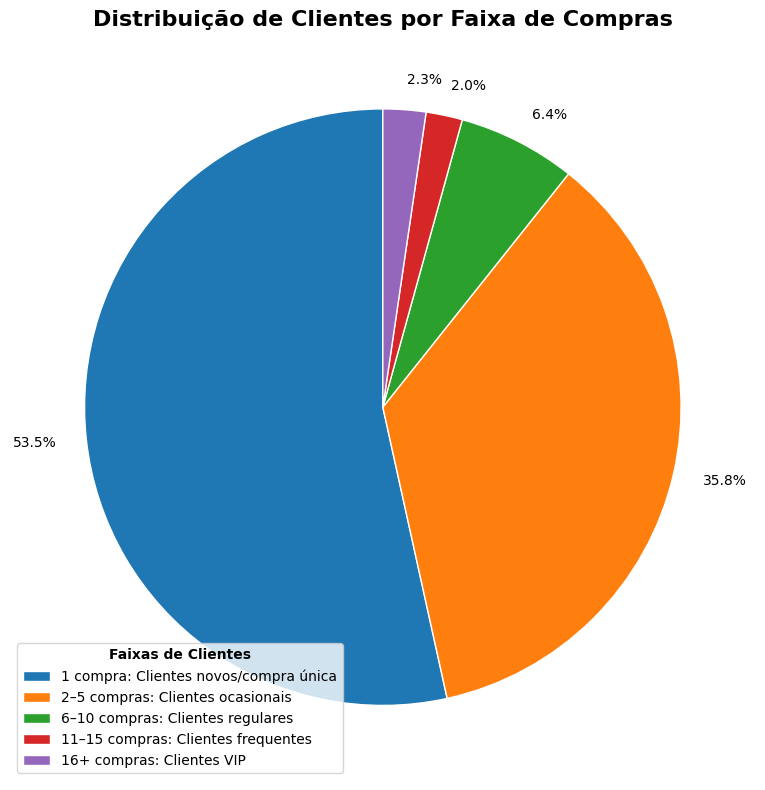

In [130]:
cliente_compra = (
   dados
   .groupby("id_cliente")["id_compra"]
   .count()
   .reset_index(name="numero_compras"))

bins = [0, 1, 5, 10, 15, cliente_compra["numero_compras"].max()]
labels = [
    "1 compra: Clientes novos/compra única",
    "2–5 compras: Clientes ocasionais",
    "6–10 compras: Clientes regulares",
    "11–15 compras: Clientes frequentes",
    "16+ compras: Clientes VIP"]

cliente_compra["faixa"] = pd.cut(
    cliente_compra["numero_compras"],
    bins=bins,
    labels=labels,
    include_lowest=True)

qtd_cliente = cliente_compra["faixa"].value_counts().sort_index()
pct_cliente = qtd_cliente / qtd_cliente.sum() * 100

labels_pizza = [f"{p:.1f}%" for p in pct_cliente] 

fig, ax = plt.subplots(figsize=(8,8))
wedges, texts = ax.pie(
    pct_cliente,
    labels=labels_pizza,
    startangle=90, # deixa reto, se não fica esquisito sei lá
    wedgeprops={"edgecolor": "white"})

ax.legend(
    wedges, labels, 
    title="Faixas de Clientes",
    title_fontproperties={'weight': 'bold'},
    loc="lower left")

plt.title("Distribuição de Clientes por Faixa de Compras", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()